# 3.1: Interpolation and Lagrange Polynomial

In [13]:
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
x = np.linspace(-3.14159,3.14159,100)
pSin = np.zeros([3,100])
pSin[0,:] = x
for n in range(1,3):
    pSin[n,:] = pSin[n-1,:] - 1/factorial(2*n+1)*x**(2*n+1)

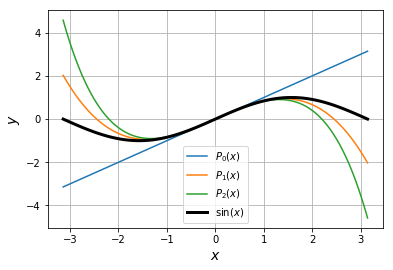

In [40]:
for n in range(0,3):
    plt.plot(x,pSin[n,:])
plt.plot(x,np.sin(x),'k',linewidth=3)
plt.legend(["$P_0(x)$","$P_1(x)$","$P_2(x)$","$\sin(x)$"])
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid()

In [42]:
x = np.linspace(-1,3,100)
pExp = np.zeros([5,100])
pExp[0,:] = 1
for n in range(1,5):
    pExp[n,:] = pExp[n-1,:] + 1/factorial(n)*x**(n)

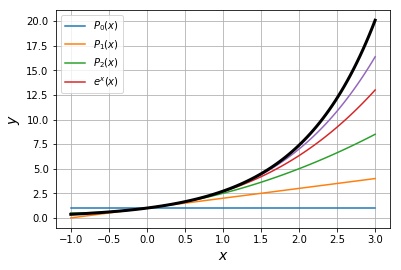

In [43]:
for n in range(0,5):
    plt.plot(x,pExp[n,:])
plt.plot(x,np.exp(x),'k',linewidth=3)
plt.legend(["$P_0(x)$","$P_1(x)$","$P_2(x)$","$e^x(x)$"])
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid()

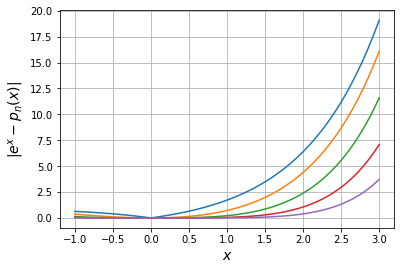

In [56]:
for n in range(0,5):
    plt.plot(x,abs(np.exp(x)-pExp[n,:]))
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$|e^x - p_n(x)|$",fontsize=14)

plt.grid()

## Example: $f(x) = x^{-1}$ near $x = 1$

  n  |  P_n(3) 
  0  |    1
  1  |    0
  2  |    1
  3  |    0
  4  |    1
  5  |    0
  6  |    1


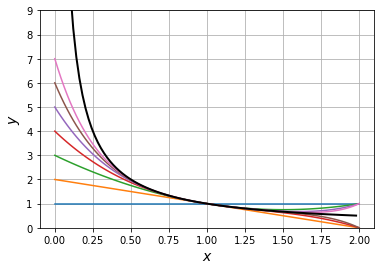

In [92]:
x = np.linspace(0,2,100)
pInv = np.zeros([7,100])
pInv[0,:] = np.ones([1,100])
plt.plot(x,pInv[0,:])
for n in range(1,7):
    pInv[n,:] = pInv[n-1] + (-1)**(n)*(x-1)**n
    plt.plot(x,pInv[n,:])
plt.plot(x[1:-1],1/x[1:-1],'k',linewidth=2)
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.ylim([0,9])
plt.grid()


print("  n  |  P_n(3) ")
print("===============")
for n in range(0,7):
    print("% 3d  |  % 3d" % (n,pInv[n,-1]))
    

##  Lagrange Interpolation

In [200]:
def L(xvals,kk,x):
    lval = np.ones(x.size)
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            lval *= (x-xvals[ii])/(xvals[kk]-xvals[ii])
    return lval


In [201]:
def p_Lagrange(xvals,fvals,x):
    n = fvals.size
    pLagrange = np.zeros(x.size)
    for kk in range(0,n):
        pLagrange += yvals[kk]*L(xvals,kk,x)
    return pLagrange

In [202]:
def LpSum(xvals,kk,x):
    lval = np.ones(x.size)
    n = xvals.size
    for ii in range(0,n):
        if ii != kk:
            lval += 1/(x-xvals[ii])
    return lval

def p_LagrangeP(xvals,fvals,x):
    n = fvals.size
    pLagrange = np.zeros(x.size)
    for kk in range(0,n):
        pLagrange += yvals[kk]*L(xvals,kk,x)*LpSum(xvals,kk,x)
    return pLagrange

### Example 1

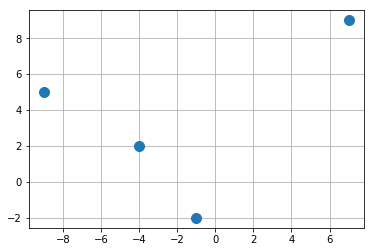

In [203]:
xvals = np.array([-9.,-4.,-1.,7.])
yvals = np.array([5.,2.,-2.,9.])
plt.plot(xvals,yvals,'o',markersize=10)
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


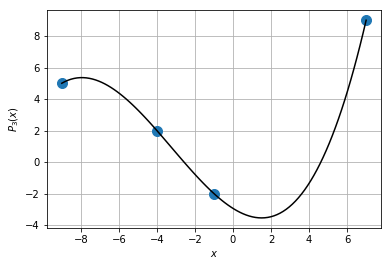

In [206]:
x = np.linspace(min(xvals),max(xvals),int(1e2))
y = p_Lagrange(xvals,yvals,x)
yp = p_LagrangeP(xvals,yvals,x)

plt.plot(xvals,yvals,'o',markersize=10)
plt.plot(x,y,color='k')
plt.xlabel('$x$')
plt.ylabel("$P_{3}(x)$")
plt.grid()

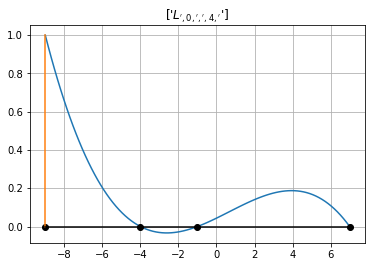

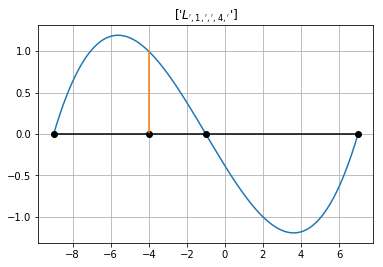

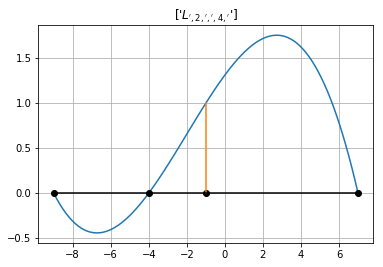

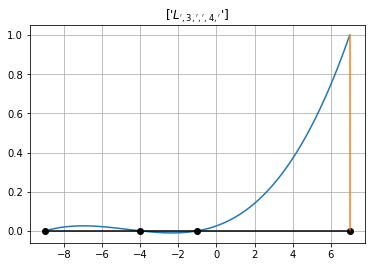

In [205]:
for kk in range(0,xvals.size):
    plt.figure()
    p = L(xvals,kk,x);
    p = p;
    plt.plot(x,p)
    plt.plot(xvals,yvals*0,'ko')
    plt.plot(xvals[kk]*np.array([1,1]),np.array([0,L(xvals,kk,xvals[kk])]))
    plt.plot(x,0*x,'k')
    plt.title(["$L_{",kk,",",xvals.size,"}$"])
    plt.grid()


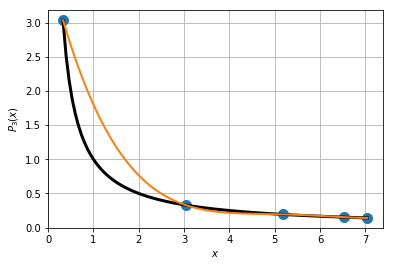

In [173]:
xvals = np.random.rand(5)*10
yvals = 1/xvals

x = np.linspace(min(xvals),max(xvals),int(1e2))
y = p_Lagrange(xvals,yvals,x)
ytrue = 1/x

plt.plot(xvals,yvals,'o',markersize=10)
plt.plot(x,ytrue,'k',linewidth=3)
plt.plot(x,y,linewidth=2)
plt.xlabel('$x$')
plt.ylabel("$P_{3}(x)$")
plt.grid()

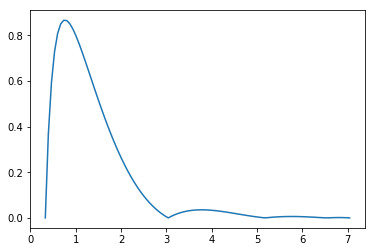

In [175]:
plt.plot(x,np.abs(y - ytrue))